In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from keras import models
from keras import layers
from keras.datasets import imdb
import pandas as pd

In [8]:
from keras.preprocessing import sequence
max_words=10000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=max_words)
maxlen=100
X_train=sequence.pad_sequences(X_train,maxlen=maxlen)
X_test=sequence.pad_sequences(X_test,maxlen=maxlen)

In [9]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32])

In [11]:
rnn=models.Sequential()
rnn.add(layers.Embedding(max_words,16))
rnn.add(layers.SimpleRNN(32,return_sequences='True'))

In [15]:

rnn.add(layers.Dense(1))
rnn.compile(loss='mse')

In [17]:
rnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          1568      
_________________________________________________________________
dense (Dense)                (None, None, 1)           33        
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           2         
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           2         
Total params: 161,605
Trainable params: 161,605
Non-trainable params: 0
_________________________________________________________________


In [18]:
history=rnn.fit(X_train,y_train,epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 9s 14ms/step - loss: 0.2016 - val_loss: 0.1750
Epoch 2/30
625/625 [==============================] - 14s 22ms/step - loss: 0.1584 - val_loss: 0.1694
Epoch 3/30
625/625 [==============================] - 15s 24ms/step - loss: 0.1482 - val_loss: 0.1706
Epoch 4/30
625/625 [==============================] - 15s 24ms/step - loss: 0.1412 - val_loss: 0.1768
Epoch 5/30
625/625 [==============================] - 14s 23ms/step - loss: 0.1368 - val_loss: 0.1774
Epoch 6/30
625/625 [==============================] - 15s 24ms/step - loss: 0.1322 - val_loss: 0.1681
Epoch 7/30
625/625 [==============================] - 15s 23ms/step - loss: 0.1286 - val_loss: 0.1697
Epoch 8/30
625/625 [==============================] - 14s 23ms/step - loss: 0.1250 - val_loss: 0.1688
Epoch 9/30
625/625 [==============================] - 15s 23ms/step - loss: 0.1216 - val_loss: 0.1677
Epoch 10/30
625/625 [==============================] - 15s 24ms/step - loss: 0.1185

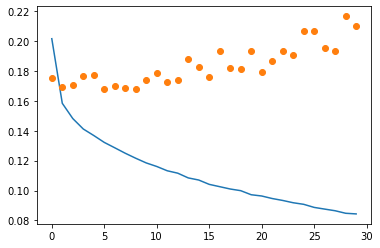

In [19]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')

In [24]:
rnn.evaluate(X_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.2139


0.21389803290367126

In [ ]:
##cnn에 비해서 정확도가 낮음을 확인할 수 있었다